# Градиентный спуск по функции "Птица" с автоматическим рассчетом градиента
Функция была выбрана из книжки "Пантелеева", стр. 225

In [4]:
import sympy as sy
import numpy as np
from matplotlib import pyplot as plt
from sympy import Symbol
from sympy.tensor.array import Array

In [5]:
x = [Symbol('x' + str(i)) for i in range(2)]

# функция "Птица"
f = -sy.sin(x[0])*sy.exp((1 - sy.cos(x[1]))**2) - sy.cos(x[1])*sy.exp((1 - sy.sin(x[0]))**2) - (x[0] - x[1])**2

# начальная точка
x0 = np.array([-0., 0.])

# градиент в точке
def df_p(fun, xt):
    dfun = Array([sy.diff(fun, _) for _ in x])
    return np.double(dfun.subs([(x[i], xt[i]) for i in range(len(x))]))

# набор точек по пути градиентного спуска
def res_p(fun, x0:np.ndarray, lr:float = 0.001, eps:float = 1e-06) -> np.ndarray:
    res = [x0]
    while True:
        df = df_p(fun, x0)
        x0 = x0 - lr*df
        res.append(x0)
        if np.linalg.norm(df) < eps:
            break
    return np.array(res)

# получить путь градиентного спуска по заданной функции
path = res_p(f, x0)

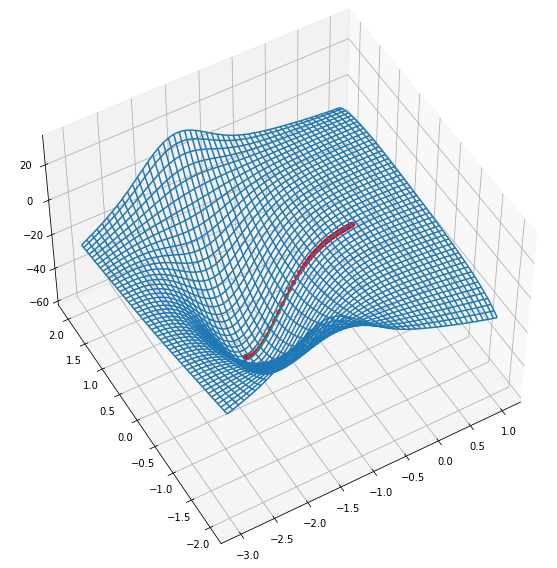

In [6]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))

# поверхность функции "Птица"
surface = lambda x: -np.sin(x[0])*np.exp((1 - np.cos(x[1]))**2) - np.cos(x[1])*np.exp((1 - np.sin(x[0]))**2) - (x[0] - x[1])**2

X = np.linspace(-3, 1, 200)
Y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(X, Y)
Z = surface([X,Y])
ax.plot_wireframe(X, Y, Z)

F = surface([path.T[0], path.T[1]])
ax.plot(path.T[0], path.T[1], F, zdir='z', color='g')
ax.scatter(path.T[0], path.T[1], F, zdir='z', color='r')
ax.view_init(50, -120)